In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("../data/flight_data_2024_sample.csv")

print(df.shape)
df.head()


(10000, 35)


,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,4,18,4,2024-04-18,MQ,3535.0,DFW,"Dallas/Fort Worth, TX",Texas,...,0,151.0,144.0,119.0,835.0,0,0,0,0,0
1,2024,1,1,1,2024-01-01,AA,148.0,CLT,"Charlotte, NC",North Carolina,...,0,286.0,273.0,253.0,1773.0,0,0,0,0,0
2,2024,12,12,4,2024-12-12,9E,5440.0,CHA,"Chattanooga, TN",Tennessee,...,0,59.0,50.0,29.0,106.0,0,0,0,0,0
3,2024,4,8,1,2024-04-08,WN,1971.0,OMA,"Omaha, NE",Nebraska,...,0,180.0,177.0,163.0,1099.0,0,0,0,0,0
4,2024,2,16,5,2024-02-16,WN,862.0,BWI,"Baltimore, MD",Maryland,...,0,90.0,96.0,76.0,399.0,0,0,0,0,0


In [5]:
for col in df.columns:
    print(col)


year
month
day_of_month
day_of_week
fl_date
op_unique_carrier
op_carrier_fl_num
origin
origin_city_name
origin_state_nm
dest
dest_city_name
dest_state_nm
crs_dep_time
dep_time
dep_delay
taxi_out
wheels_off
wheels_on
taxi_in
crs_arr_time
arr_time
arr_delay
cancelled
cancellation_code
diverted
crs_elapsed_time
actual_elapsed_time
air_time
distance
carrier_delay
weather_delay
nas_delay
security_delay
late_aircraft_delay


In [6]:
df["target_delay"] = (df["arr_delay"] >= 15).astype(int)

df["target_delay"].value_counts()


target_delay
0    7881
1    2119
Name: count, dtype: int64

In [7]:
features = [
    "year",
    "month",
    "day_of_month",
    "day_of_week",
    "crs_dep_time",
    "crs_arr_time",
    "dep_delay"
]

X = df[features]
y = df["target_delay"]


In [8]:
X.isna().sum()


year              0
month             0
day_of_month      0
day_of_week       0
crs_dep_time      0
crs_arr_time      0
dep_delay       116
dtype: int64

In [9]:
df["target_delay"] = (df["arr_delay"] >= 15).astype(int)

df["target_delay"].value_counts()


target_delay
0    7881
1    2119
Name: count, dtype: int64

In [10]:
df["dep_delay"] = df["dep_delay"].fillna(0)


In [16]:
df.isna().sum()


year                      0
month                     0
day_of_month              0
day_of_week               0
fl_date                   0
op_unique_carrier         0
op_carrier_fl_num         0
origin                    0
origin_city_name          0
origin_state_nm           0
dest                      0
dest_city_name            0
dest_state_nm             0
crs_dep_time              0
dep_time                116
dep_delay                 0
taxi_out                120
wheels_off              120
wheels_on               127
taxi_in                 127
crs_arr_time              0
arr_time                127
arr_delay               164
cancelled                 0
cancellation_code      9878
diverted                  0
crs_elapsed_time          0
actual_elapsed_time     164
air_time                164
distance                  0
carrier_delay             0
weather_delay             0
nas_delay                 0
security_delay            0
late_aircraft_delay       0
target_delay        

In [13]:
features = [
    "year",
    "month",
    "day_of_month",
    "day_of_week",
    "crs_dep_time",
    "crs_arr_time",
    "dep_delay"
]

X = df[features]
y = df["target_delay"]


In [14]:
X.head()
y.value_counts()


target_delay
0    7881
1    2119
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1576
           1       0.93      0.72      0.81       424

    accuracy                           0.93      2000
   macro avg       0.93      0.85      0.89      2000
weighted avg       0.93      0.93      0.93      2000



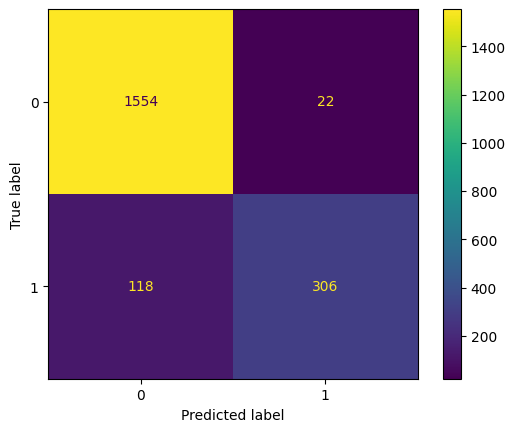

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [23]:
!pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 131.3 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 131.3 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 131.3 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 131.3 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 131.3 kB/s eta 0:00:03
   ---- ---------------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


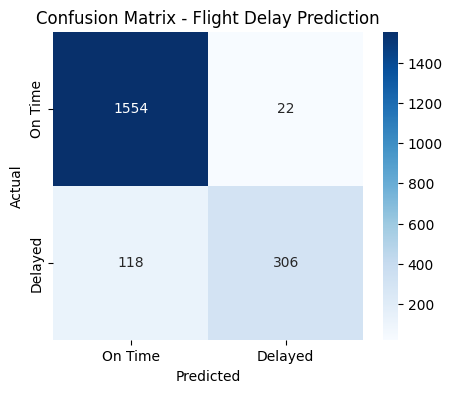

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["On Time", "Delayed"],
            yticklabels=["On Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Flight Delay Prediction")
plt.show()


In [25]:
import joblib

joblib.dump(model, "flight_delay_model.pkl")


['flight_delay_model.pkl']